# 🎬 Reto de Análisis de Películas – *Movies Challenge*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
# Project root directory
project_root = Path().resolve()
movies_data_path = str(project_root / "retos" / "reto-movies-jasonssdev" / "data" / "movies.csv")


In [9]:
df_movies = pd.read_csv(movies_data_path, sep=',', encoding='utf-8')
df_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


### 1️⃣ Duración promedio por década  
**Pregunta:**  
> ¿Cuál es la duración media de las películas y cómo ha evolucionado en cada década?

**Pista:**  
Agrupa por la **década** derivada de la columna `title_year` y calcula la media de `duration`.

In [10]:
# Asegurarse de que 'title_year' sea numérico
df_movies["title_year"] = pd.to_numeric(df_movies["title_year"], errors="coerce")

# Crear columna de década (ej.: 1990, 2000, ...)
df_movies["decada"] = (df_movies["title_year"] // 10) * 10

# Calcular la duración media por década
duracion_promedio_decada = (
    df_movies
      .groupby("decada")["duration"]
      .mean()
      .dropna()
      .round(1)
)

duracion_promedio_decada

decada
1910.0    123.0
1920.0    123.2
1930.0    101.8
1940.0    107.8
1950.0    120.5
1960.0    130.1
1970.0    117.9
1980.0    111.7
1990.0    111.3
2000.0    106.4
2010.0    106.3
Name: duration, dtype: float64

### 2️⃣ Directores taquilleros  
**Pregunta:**  
> ¿Qué 5 directores acumulan la mayor recaudación total (`gross`) en el dataset?

**Pista:**  
Agrupa por `director_name`, suma la columna `gross`, luego ordena de mayor a menor y muestra los primeros cinco resultados.

In [11]:
# Top 5 directores con mayor recaudación total
top_directores = (
    df_movies
    .groupby("director_name")["gross"]
    .sum(min_count=1)          # ignora NaN
    .sort_values(ascending=False)
    .head(5)
    .rename("gross_total_usd")
    .round(0)
)

top_directores

director_name
Steven Spielberg    4.114233e+09
Peter Jackson       2.592969e+09
Michael Bay         2.231243e+09
Tim Burton          2.071275e+09
Sam Raimi           2.049549e+09
Name: gross_total_usd, dtype: float64

### 3️⃣ Presupuesto vs. Éxito crítico  
**Pregunta:**  
> ¿Existe correlación entre el presupuesto (`budget`) y la puntuación IMDb (`imdb_score`)?

**Pista:**  
Convierte `budget` a numérico (puede tener nulos), luego usa el método `.corr()` de Pandas para obtener el coeficiente de Pearson entre ambas columnas.

In [12]:
# Convertir budget a numérico por si hay strings o NaN
df_movies["budget"] = pd.to_numeric(df_movies["budget"], errors="coerce")

# Calcular correlación de Pearson
correlacion = df_movies["budget"].corr(df_movies["imdb_score"])
print(f"Coeficiente de correlación (Pearson) budget vs imdb_score: {correlacion:.3f}")

Coeficiente de correlación (Pearson) budget vs imdb_score: 0.031


### 4️⃣ Género y clasificación  
**Pregunta:**  
> ¿Cuál es el género con el mayor porcentaje de películas clasificadas como **PG-13**?

**Pista:**  
1. La columna `genres` contiene varios géneros separados por `"|"`.  
2. Expande esa columna (`str.split('|')`) y usa `explode()` para tener un género por fila.  
3. Filtra las filas con `content_rating == 'PG-13'`, cuenta cuántas películas tiene cada género y calcula el porcentaje sobre el total de PG-13.

In [14]:
# Expansión de géneros y filtrado por PG-13
df_gen = (
    df_movies
    .assign(gen_list=lambda d: d["genres"].str.split("|"))
    .explode("gen_list")                               # un género por fila
    .rename(columns={"gen_list": "genre"})
)

# Total de películas PG-13
total_pg13 = df_gen[df_gen["content_rating"] == "PG-13"].shape[0]

# Conteo por género dentro de PG-13
pg13_por_genero = (
    df_gen[df_gen["content_rating"] == "PG-13"]
    .groupby("genre")
    .size()
    .sort_values(ascending=False)
    .rename("count_pg13")
    .to_frame()
)

# Calcular porcentaje
pg13_por_genero["porcentaje"] = (pg13_por_genero["count_pg13"] / total_pg13) * 100

# Mostrar el género con mayor porcentaje
pg13_por_genero.head(1).round(1)

,count_pg13,porcentaje
genre,,
Drama,721,17.0


### 5️⃣ Críticas vs. Puntuación  
**Pregunta:**  
> ¿Cómo se relaciona el número de **críticas de usuarios** con la puntuación IMDb?

**Pista:**  
Utiliza la columna `num_user_for_reviews` como indicador de cuántas críticas ha recibido una película.  
Calcula el coeficiente de correlación (Pearson) con `imdb_score` y, opcionalmente, crea un scatterplot para visualizar la relación.

Correlación reviews de usuarios vs IMDb score: 0.292


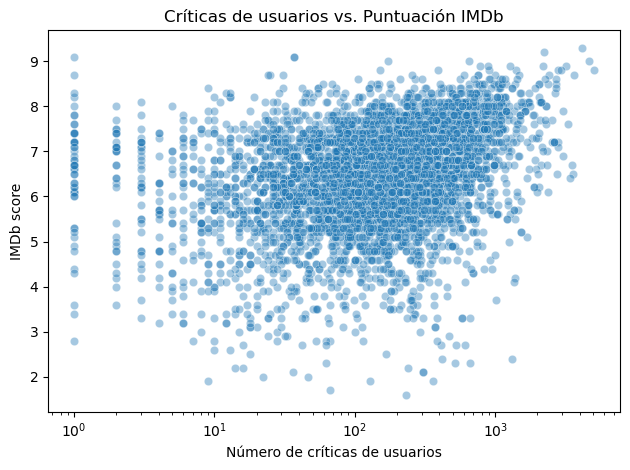

In [15]:
# Asegurarse de que la columna sea numérica
df_movies["num_user_for_reviews"] = pd.to_numeric(
    df_movies["num_user_for_reviews"], errors="coerce"
)

# Correlación
corr_reviews = df_movies["num_user_for_reviews"].corr(df_movies["imdb_score"])
print(f"Correlación reviews de usuarios vs IMDb score: {corr_reviews:.3f}")

# Visualización opcional
sns.scatterplot(
    data=df_movies,
    x="num_user_for_reviews",
    y="imdb_score",
    alpha=0.4
)
plt.title("Críticas de usuarios vs. Puntuación IMDb")
plt.xlabel("Número de críticas de usuarios")
plt.ylabel("IMDb score")
plt.xscale("log")  # escala log para ver mejor la dispersión
plt.tight_layout()
plt.show()

### 6️⃣ Mercados más lucrativos  
**Pregunta:**  
> ¿Qué país presenta la **mediana** de recaudación (`gross`) más alta?

**Pista:**  
Agrupa por `country`, calcula la **mediana** de `gross`, ordena de mayor a menor y revisa el primer resultado.  
La mediana es menos sensible a outliers que el promedio, por eso se usa aquí.

In [16]:
# Convertir gross a numérico por seguridad
df_movies["gross"] = pd.to_numeric(df_movies["gross"], errors="coerce")

# Mediana de recaudación por país
mediana_gross_pais = (
    df_movies
    .groupby("country")["gross"]
    .median()
    .dropna()
    .sort_values(ascending=False)
    .rename("gross_mediana_usd")
)

# País con la mediana más alta
mediana_gross_pais.head(1).round(0)

country
Taiwan    64340682.0
Name: gross_mediana_usd, dtype: float64

### 7️⃣ Color vs. Blanco-y-negro  
**Pregunta:**  
> ¿Cómo difieren las puntuaciones IMDb entre películas a **color** y **blanco-y-negro**?

**Pista:**  
La columna `color` indica `'Color'` o `'Black and White'`.  
Comparar las distribuciones con un **boxplot** (o violinplot) y, si quieres un número, calcula la media o mediana de `imdb_score` para cada categoría.

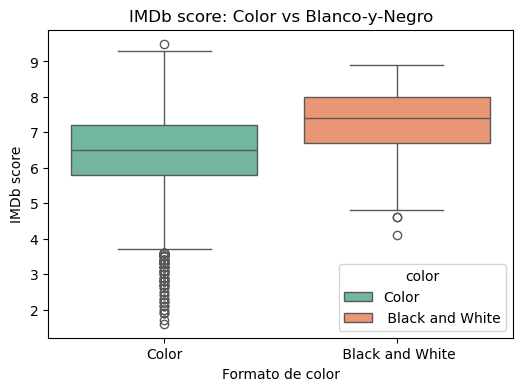

color
 Black and White    7.23
Color               6.41
Name: imdb_score, dtype: float64

In [25]:
# Boxplot de puntuación IMDb según si la película es a color o B/N
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df_movies,
    x="color",
    y="imdb_score",
    palette="Set2",
    hue="color"  
)
plt.title("IMDb score: Color vs Blanco-y-Negro")
plt.xlabel("Formato de color")
plt.ylabel("IMDb score")
plt.show()

# Media de cada grupo (opcional)
df_movies.groupby("color")["imdb_score"].mean().round(2)

### 8️⃣ Rostro del éxito  
**Pregunta:**  
> ¿Qué actor o actriz aparece con mayor frecuencia entre las **100 películas con mejor puntuación IMDb**?

**Pista:**  
1. Ordena el DataFrame por `imdb_score` de forma descendente y conserva solo las primeras 100 filas.  
2. Combina las columnas `actor_1_name`, `actor_2_name`, `actor_3_name` en una sola serie (`pd.concat`).  
3. Usa `value_counts()` para contar apariciones y obtén el primer resultado.

In [18]:
# Paso 1: Top 100 películas por puntaje IMDb
top100 = df_movies.nlargest(100, "imdb_score")

# Paso 2: Unir los nombres de los tres actores por fila en una sola serie
actors_series = pd.concat([
    top100["actor_1_name"],
    top100["actor_2_name"],
    top100["actor_3_name"]
])

# Paso 3: Contar apariciones y encontrar el actor/actriz más frecuente
actor_mas_frecuente = actors_series.value_counts().head(1)
actor_mas_frecuente

Harrison Ford    5
Name: count, dtype: int64

### 9️⃣ Recaudación por clasificación  
**Pregunta:**  
> ¿Cómo varía la recaudación (`gross`) según la clasificación por edad (`content_rating`)?  
> (Compara las distribuciones con un **boxplot**).

**Pista:**  
Filtra valores nulos en `gross`, usa `hue="color"` `sns.boxplot()` con `x='content_rating'` y `y='gross'`; rota las etiquetas para legibilidad.

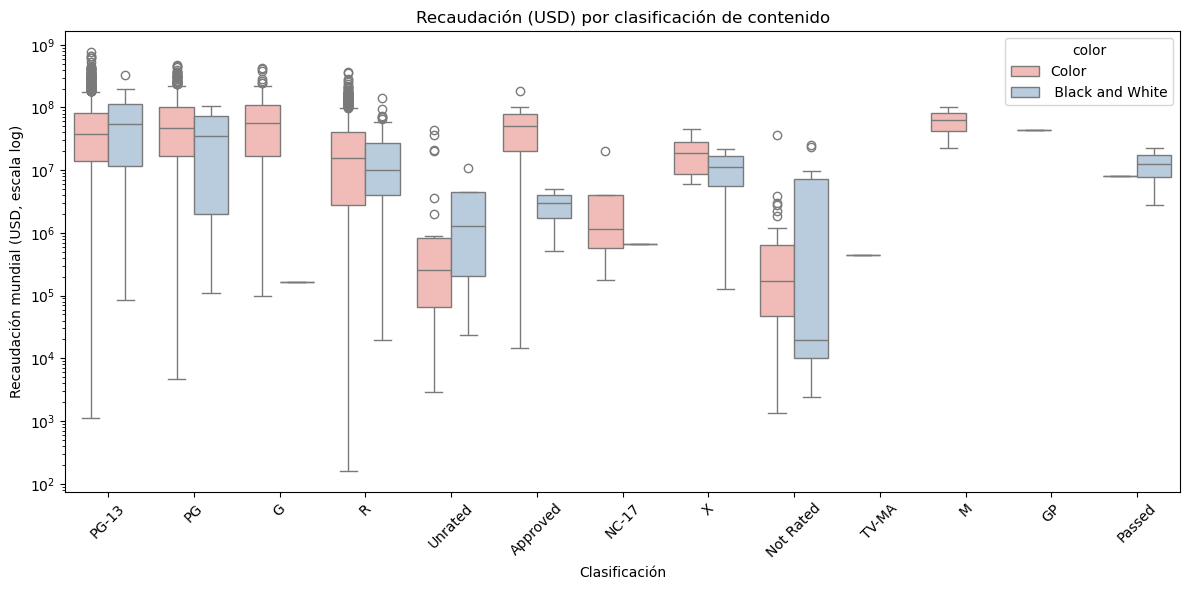

In [23]:
# Asegurar valores numéricos y eliminar nulos en gross
df_movies["gross"] = pd.to_numeric(df_movies["gross"], errors="coerce")
df_rating = df_movies.dropna(subset=["gross", "content_rating"])

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_rating,
    x="content_rating",
    y="gross",
    palette="Pastel1",
    hue="color"
)

plt.yscale("log")         # escala log para visualizar mejor la dispersión
plt.title("Recaudación (USD) por clasificación de contenido")
plt.xlabel("Clasificación")
plt.ylabel("Recaudación mundial (USD, escala log)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🔟 Géneros más rentables  
**Pregunta:**  
> ¿Qué **tres géneros** presentan la recaudación promedio (`gross`) más alta?

**Pista:**  
Expande la columna `genres` con `str.split('|')` + `explode()`, convierte `gross` a numérico, agrupa por género y calcula la media.

In [24]:
# Top 3 géneros con mayor recaudación promedio
df_genres = (
    df_movies
    .assign(gen_list=lambda d: d["genres"].str.split("|"))
    .explode("gen_list")
    .rename(columns={"gen_list": "genre"})
)

df_genres["gross"] = pd.to_numeric(df_genres["gross"], errors="coerce")

top3_generos = (
    df_genres
    .groupby("genre")["gross"]
    .mean()
    .dropna()
    .sort_values(ascending=False)
    .head(3)
    .round(0)
    .rename("gross_promedio_usd")
)

top3_generos

genre
Animation    106954239.0
Adventure     98405188.0
Family        89302305.0
Name: gross_promedio_usd, dtype: float64

## 🎉 ¡Felicitaciones!

Has completado el **Reto de Análisis de Películas** — demostraste tu habilidad para limpiar datos, explorar patrones y extraer insights accionables a partir de información cinematográfica. 👏

Tu notebook ya forma parte de la colección de soluciones de PyData Panamá.  
¡Comparte tus hallazgos en redes y sigue practicando; el próximo blockbuster de datos espera por ti! 🚀